In [3]:
import pandas as pd
import numpy as np

In [7]:
from sklearn import datasets

In [11]:
iris = datasets.load_iris()

In [101]:
X = iris.data[:, [0, 2]]
y = iris.target

In [103]:
from sklearn.model_selection import train_test_split

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42 )

In [107]:
from sklearn.preprocessing import StandardScaler

In [109]:
sc = StandardScaler()
sc.fit(X)  # Fit on the entire dataset to avoid shape mismatch
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [111]:
from sklearn.neighbors import KNeighborsClassifier

In [113]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

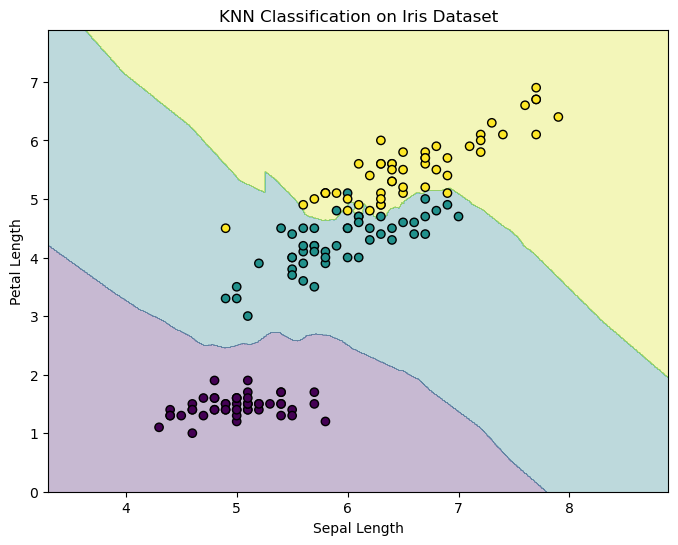

In [115]:
# Plot decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = knn.predict(sc.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
plt.title("KNN Classification on Iris Dataset")
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.show()